# Import & Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from dython.nominal import associations
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import VotingClassifier

# Load the dataset

In [2]:
data = pd.read_csv ('Thoraricsurgery.csv')
data.head()

,id,diagnose,in_vol,out_vol,pain,Haemoptysis,short_breath,cough,weekness,tumour_size,diabetes,breathing_difficulty,other_disease,smoking,asthma,age,survive
0,1,DGN2,2.88,2.16,F,F,F,T,T,OC14,F,F,F,T,F,60,2
1,2,DGN3,3.40,1.88,F,F,F,F,F,OC12,F,F,F,T,F,51,2
2,3,DGN3,2.76,2.08,F,F,F,T,F,OC11,F,F,F,T,F,59,2
3,4,DGN3,3.68,3.04,F,F,F,F,F,OC11,F,F,F,F,F,54,2
4,5,DGN3,2.44,0.96,F,T,F,T,T,OC11,F,F,F,T,F,73,1


# Data Preparation 

In [3]:
data.isna ().sum ()

id                      0
diagnose                0
in_vol                  0
out_vol                 0
pain                    0
Haemoptysis             0
short_breath            0
cough                   0
weekness                0
tumour_size             0
diabetes                0
breathing_difficulty    0
other_disease           0
smoking                 0
asthma                  0
age                     0
survive                 0
dtype: int64

##### No missing values

In [4]:
data.duplicated ().sum ()

0

##### No duplicates

In [5]:
data.shape

(470, 17)

##### Dataset has 470 records and 17 columns

In [6]:
data.columns

Index(['id', 'diagnose', 'in_vol', 'out_vol', 'pain', 'Haemoptysis',
       'short_breath', 'cough', 'weekness', 'tumour_size', 'diabetes',
       'breathing_difficulty', 'other_disease', 'smoking', 'asthma', 'age',
       'survive'],
      dtype='object')

# EDA

In [7]:
cats = ['diagnose', 'pain', 'Haemoptysis', 'short_breath', 'cough', 'weekness', 'tumour_size', 'diabetes', 
      'breathing_difficulty', 'other_disease', 'smoking', 'asthma', 'survive']
nums = ['in_vol', 'out_vol', 'age']

In [8]:
train, test= train_test_split(data, test_size = 0.2, random_state = 0)

### Checking Outliers

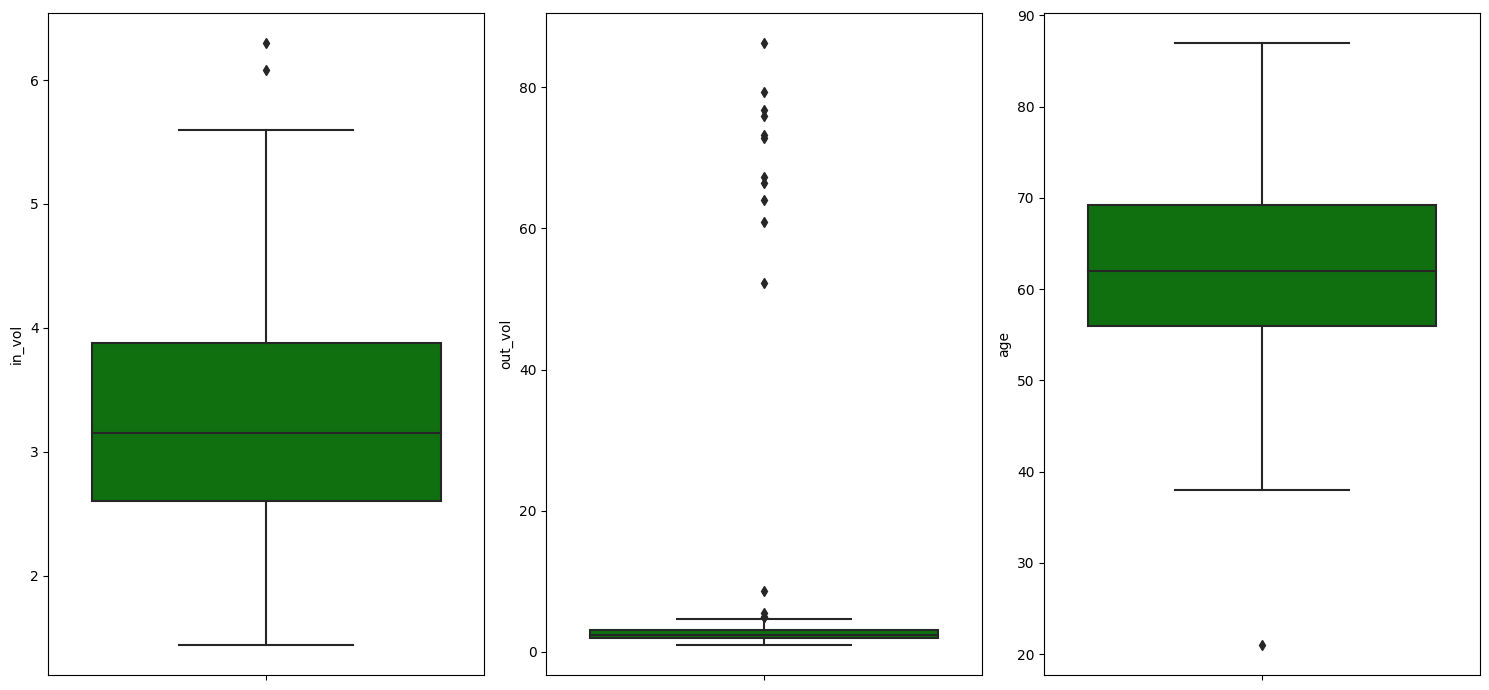

In [9]:
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=train[nums[i]],color='green',orient='v')
    plt.tight_layout()

### Survival of the patient after 1 year from Surgery

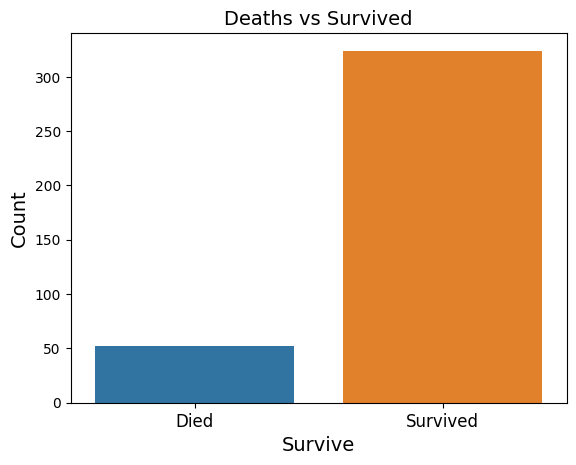

In [10]:
fig, ax1 = plt. subplots (1,1)
g = sns.countplot (x=train['survive'], ax=ax1)
plt.title ('Deaths vs Survived',fontsize=14 )
plt.xlabel('Survive', fontsize = 14 )
plt.ylabel('Count', fontsize = 14 )
g.set_xticklabels (['Died', 'Survived'], fontsize = 12 )
plt.show()

### Diagnosis type of the cancer

In [12]:
train['diagnose'].value_counts()

DGN3    270
DGN2     47
DGN4     40
DGN5     13
DGN6      3
DGN8      2
DGN1      1
Name: diagnose, dtype: int64

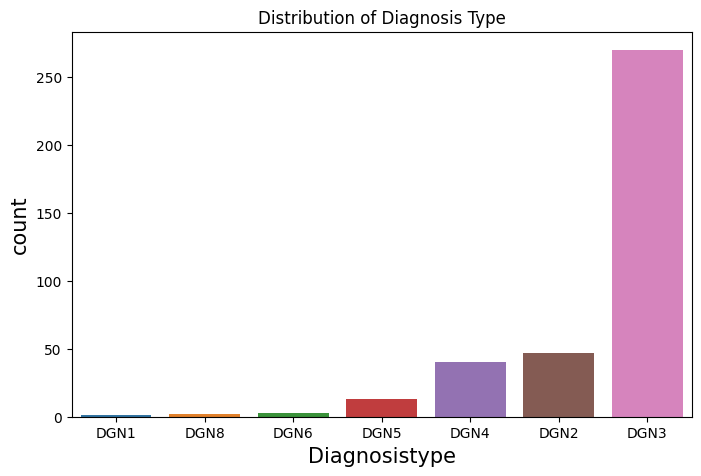

In [13]:
Diagnosis = {'Diagnosis_type': ['DGN1', 'DGN2', 'DGN3', 'DGN4', 'DGN5', 'DGN6', 'DGN8'],
             'Count': [1, 47,270, 40, 13,3,2]}
df_diagnosis = pd. DataFrame (Diagnosis)
df_diagnosis = df_diagnosis.sort_values(["Count"], ascending = True)
plt.figure(figsize=(8,5))
sns.barplot (x = "Diagnosis_type", y = "Count", data = df_diagnosis, ci = None )
plt.title('Distribution of Diagnosis Type')
plt.xlabel('Diagnosistype', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [53]:
pd_df = train [train ['survive'] == 1]
pd_df['diagnose'].value_counts()

DGN3    30
DGN2    10
DGN5     6
DGN4     5
DGN8     1
Name: diagnose, dtype: int64

In [54]:
b = pd_df['diagnose'].value_counts().sum ()
Diagnosisl =  {'Diagnosis_type': ['DGN1', 'DGN2', 'DGN3', 'DGN4', 'DGN5', 'DGN6', 'DGN8'],
               'Prob': [0, 10/b, 30/b, 5/b, 6/b, 0,1/b]}
df1_diagnosis = pd.DataFrame (Diagnosisl)
df1_diagnosis = df1_diagnosis.sort_values(["Prob"], ascending=True)
df1_diagnosis

,Diagnosis_type,Prob
0,DGN1,0.000000
5,DGN6,0.000000
6,DGN8,0.019231
3,DGN4,0.096154
4,DGN5,0.115385
1,DGN2,0.192308
2,DGN3,0.576923


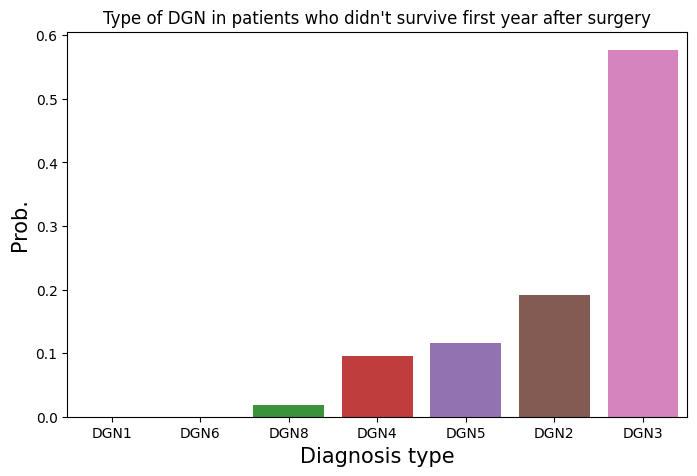

In [55]:
# Type of DGN in patients who didn't survive first year after surgery
plt. figure (figsize=(8,5))
sns.barplot (x="Diagnosis_type", y="Prob", data = df1_diagnosis, ci = None )
plt.title ("Type of DGN in patients who didn't survive first year after surgery")
plt.xlabel ('Diagnosis type', fontsize = 15)
plt.ylabel ('Prob.', fontsize = 15)
plt.show()

### Distributons of 'in_vol' and 'out_vol'

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



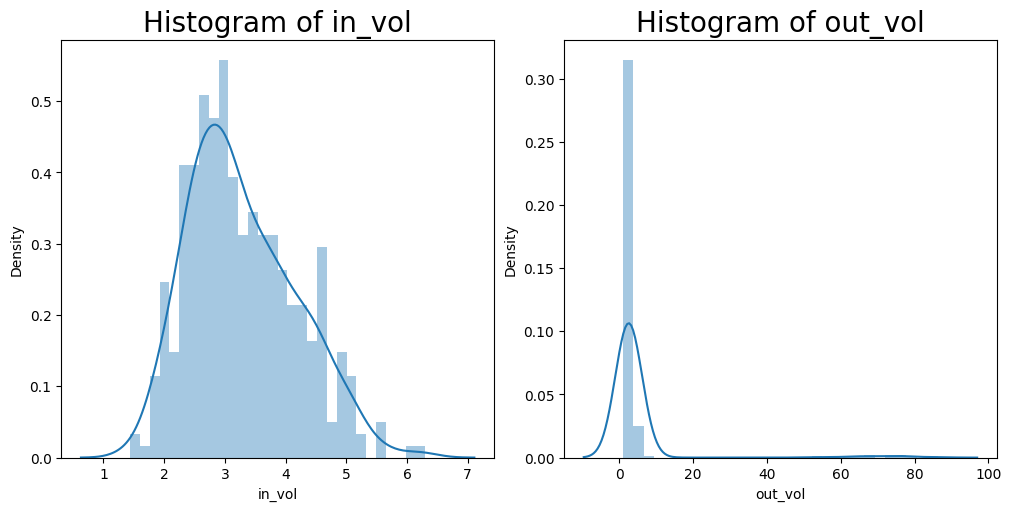

In [17]:
## Distributons of 'FVC' and 'FEV1'
def plot_hist (col, bins=30, title="",xlabel="", ax=None) :
    sns.distplot (col, bins=bins, ax=ax)
    ax.set_title (f'Histogram of {title}', fontsize=20)
    ax.set_xlabel (xlabel)
fig, axes = plt.subplots (1, 2, figsize = (10, 5), constrained_layout=True)
plot_hist (train.in_vol, title='in_vol', xlabel="in_vol", ax=axes[0])
plot_hist (train.out_vol, title='out_vol', xlabel="out_vol", ax=axes[1])

### Diabetes Vs Survival

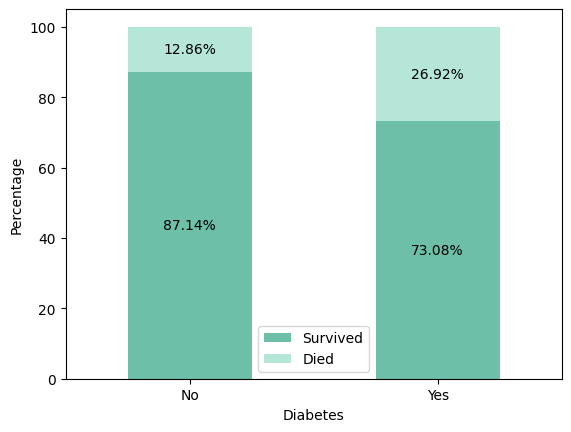

In [18]:
## Dependency of diabetes in determining survival of a patient
pd.crosstab (train ['diabetes'], train ['survive']).apply (lambda r: (r/r.sum ())*100, axis=1)
rating = pd. DataFrame ({ 'Survived': [ 87.14, 73.08], 'Died': [ 12.86, 26.92]})
Class = ["No", "Yes"]
ax = rating.plot (stacked=True, kind='bar', color = ['#6dbfa7', '#b5e6d7'])
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = str('{:.2f}'. format (height)) + '%'
    label_x= x + width / 2
    label_y = y + height / 2
    ax.text (label_x, label_y, label_text, ha='center', va='center')
ax.set_xticklabels (Class, rotation='horizontal')
plt.ylabel ('Percentage')
plt.xlabel ('Diabetes')
plt.show()

### Other disease Vs Survival

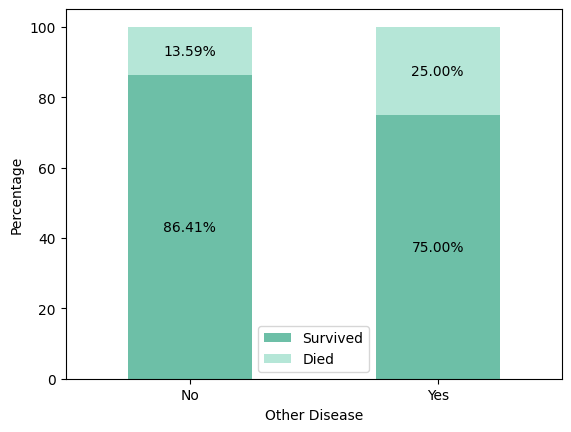

In [19]:
## Dependency of having PAD in determining survival of a patient
pd.crosstab (train['other_disease'], train['survive']).apply(lambda r:(r/r.sum())*100, axis=1)
rating = pd.DataFrame({'Survived': [ 86.41, 75], 'Died': [ 13.59, 25]})
Class = ["No", "Yes"]
ax = rating.plot (stacked=True, kind='bar', color= ['#6dbfa7', '#b5e6d7'])
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = str('{:.2f}'.format(height)) + '%'
    label_x = x+width/2
    label_y = y+height/2
    ax.text(label_x, label_y, label_text, ha='center', va='center')
ax.set_xticklabels(Class, rotation='horizontal')
plt.ylabel('Percentage')
plt.xlabel('Other Disease')
plt.show()

### Smoking before surgery

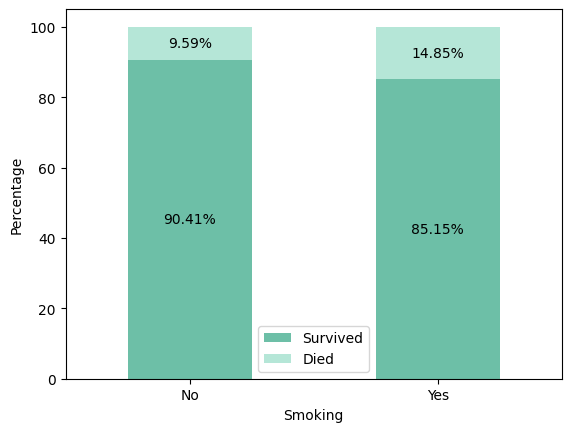

In [20]:
## dependency of smoking in determining the survival of a patient
pd.crosstab (train['smoking'], train['survive']).apply(lambda r:(r/r.sum())*100, axis=1)
rating = pd.DataFrame({'Survived': [ 90.41, 85.15], 'Died': [ 9.59, 14.85]})
Class = ["No", "Yes"]
ax = rating.plot (stacked=True, kind='bar', color= ['#6dbfa7', '#b5e6d7'])
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = str('{:.2f}'.format(height)) + '%'
    label_x = x+width/2
    label_y = y+height/2
    ax.text(label_x, label_y, label_text, ha='center', va='center')
ax.set_xticklabels(Class, rotation='horizontal')
plt.ylabel('Percentage')
plt.xlabel('Smoking')
plt.show()

### Age Vs Survival

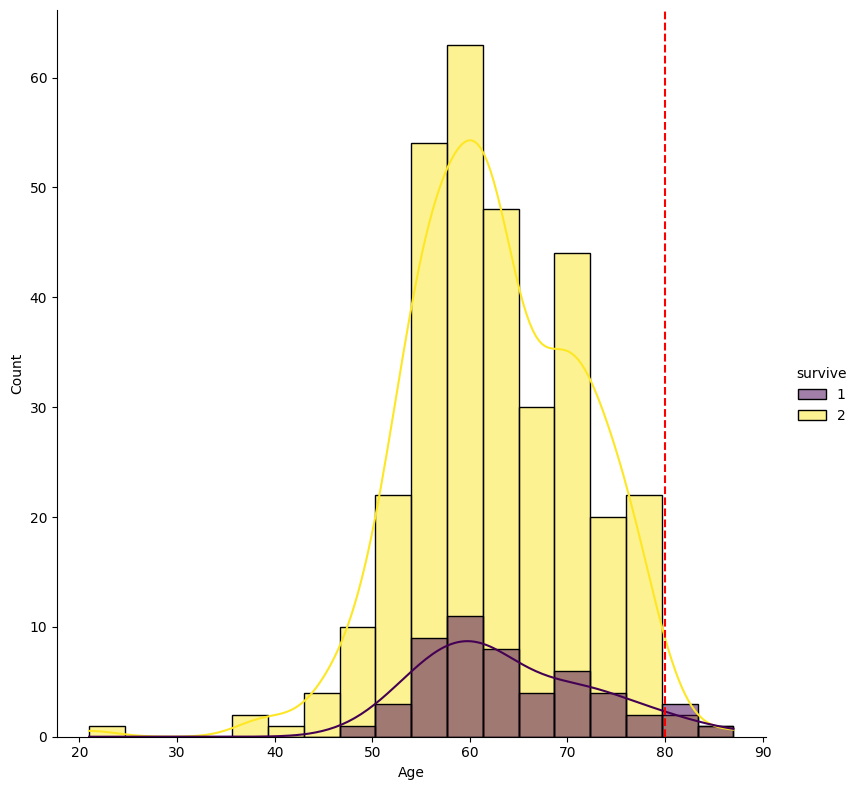

In [21]:
## Age & survival
g = sns.displot(data=train, x='age', hue = 'survive', kde = True, height = 8, palette = 'viridis')
plt.axvline(x=80, ls='--', color='red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Size of the Tumor

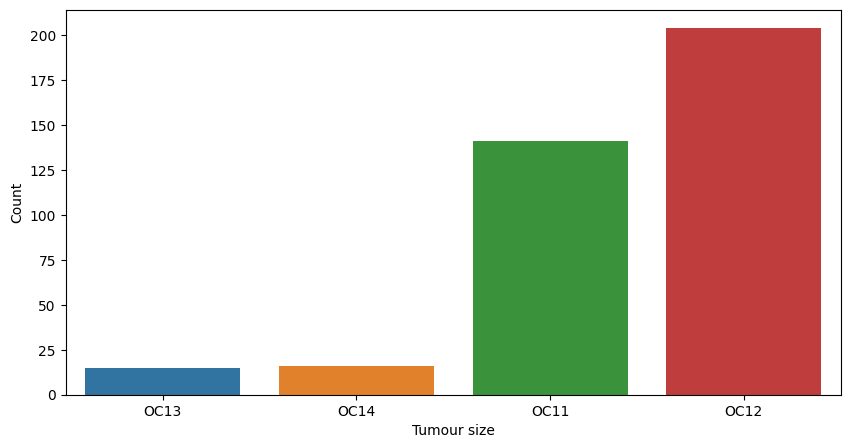

In [22]:
## size of tumour
train['tumour_size'].value_counts()
tumour = {'Tumour_size':['OC13', 'OC14', 'OC11', 'OC12'], 
         'Count': [15, 16, 141, 204]}
df_tumour = pd.DataFrame(tumour)
df_tumour = df_tumour.sort_values(['Count'], ascending=True)
plt.figure(figsize=(10,5))
sns.barplot(x='Tumour_size', y='Count', data = df_tumour, ci = None)
plt.xlabel('Tumour size')
plt.ylabel('Count')
plt.show()

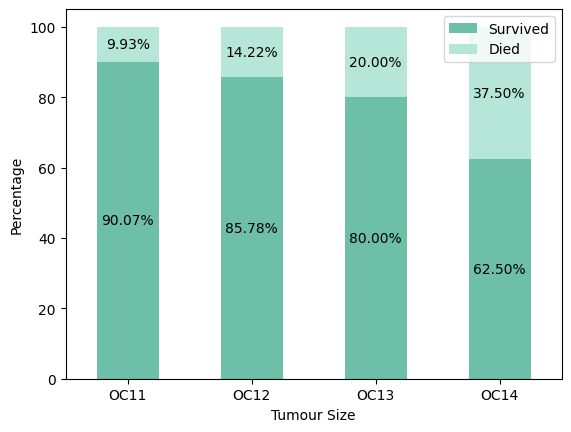

In [23]:
pd.crosstab (train['tumour_size'], train['survive']).apply(lambda r:(r/r.sum())*100, axis=1)
rating = pd.DataFrame({'Survived': [ 90.07, 85.78, 80.00, 62.50], 'Died': [ 9.93, 14.22, 20.00, 37.50]})
Class = ["OC11", "OC12", "OC13", "OC14"]
ax = rating.plot (stacked=True, kind='bar', color= ['#6dbfa7', '#b5e6d7'])
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = str('{:.2f}'.format(height)) + '%'
    label_x = x+width/2
    label_y = y+height/2
    ax.text(label_x, label_y, label_text, ha='center', va='center')
ax.set_xticklabels(Class, rotation='horizontal')
plt.ylabel('Percentage')
plt.xlabel('Tumour Size')
plt.show()

### Correlation - Association plot

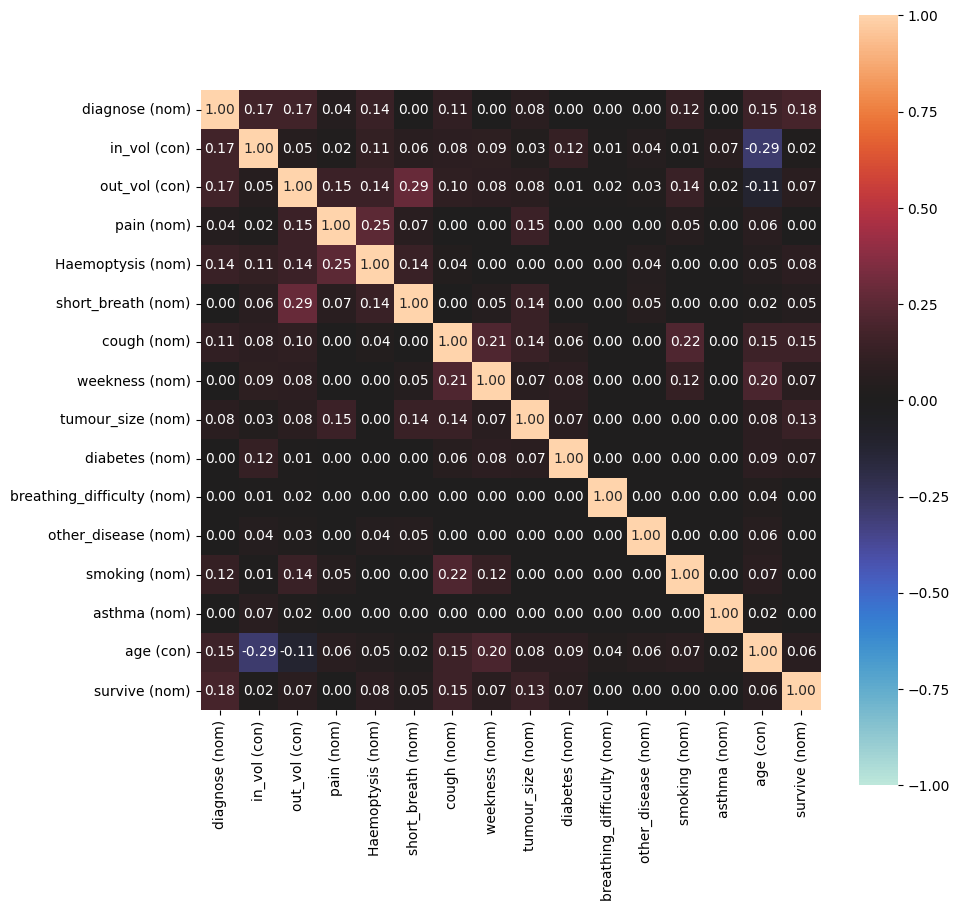

{'corr':                             diagnose (nom)  in_vol (con)  out_vol (con)  \
 diagnose (nom)                    1.000000      0.166517       0.168142   
 in_vol (con)                      0.166517      1.000000       0.053823   
 out_vol (con)                     0.168142      0.053823       1.000000   
 pain (nom)                        0.042366      0.017571       0.146269   
 Haemoptysis (nom)                 0.138362      0.109497       0.144827   
 short_breath (nom)                0.000000      0.062922       0.285206   
 cough (nom)                       0.108755      0.079230       0.096225   
 weekness (nom)                    0.000000      0.090269       0.083867   
 tumour_size (nom)                 0.077274      0.032563       0.075106   
 diabetes (nom)                    0.000000      0.119636       0.009280   
 breathing_difficulty (nom)        0.000000      0.010770       0.015172   
 other_disease (nom)               0.000000      0.040725       0.027949   
 smo

In [56]:
# dython - all variables
associations(train.drop('id', axis = 1), nominal_columns=cats, 
             numerical_columns=nums, mark_columns=True, fmt='.2f',
              figsize=(10, 10))

## Remove outliers

In [27]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR= Q3 - Q1
filter = (data['age'] >= Q1-1.5*IQR) & (data['age'] <= Q3+1.5*IQR)
data = data.loc[filter]

Q1 = data['in_vol'].quantile(0.25)
Q3 = data['in_vol'].quantile(0.75)
IQR = Q3-Q1
filter = (data['in_vol'] >= Q1-1.5*IQR) & (data['in_vol'] <= Q3+1.5*IQR)
data = data.loc[filter]

Q1 = data['out_vol'].quantile(0.25)
Q3 = data['out_vol'].quantile(0.75)
IQR = Q3-Q1
filter = (data['out_vol'] >= Q1-1.5*IQR) & (data['out_vol'] <= Q3+1.5*IQR)
data = data.loc[filter]

## Create dummy variables

In [28]:
data1 = pd.get_dummies(data, columns=cats, drop_first=True)
data1.head()

,id,in_vol,out_vol,age,diagnose_DGN2,diagnose_DGN3,diagnose_DGN4,diagnose_DGN5,diagnose_DGN6,diagnose_DGN8,...,weekness_T,tumour_size_OC12,tumour_size_OC13,tumour_size_OC14,diabetes_T,breathing_difficulty_T,other_disease_T,smoking_T,asthma_T,survive_2
0,1,2.88,2.16,60,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,2,3.40,1.88,51,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,3,2.76,2.08,59,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4,3.68,3.04,54,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,2.44,0.96,73,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


## Scale

In [ ]:
rs = RobustScaler()
data1[nums] = rs.fit_transform(data[nums])

## Train-Test split

In [30]:
X = data1.drop(['survive_2', 'id'], axis=1)
y = data1['survive_2']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 0)

## Oversampling - SMOTE

In [31]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Utilize machine learning models

### Logistic Reggression - original data

In [ ]:
logreg  = LogisticRegression(random_state=42, solver = 'liblinear')
logreg = logreg.fit(X_train, y_train)
# predict the train data
ytrain_predicted = logreg.predict(X_train)
print('\nclassification report')
print(classification_report(y_train, ytrain_predicted))  
print('LogReg: ROC AUC = ',str(round(roc_auc_score(y_train, ytrain_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(y_train, ytrain_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(y_train, ytrain_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(y_train, ytrain_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(y_train, ytrain_predicted)*100,1)), '%')
confusion_matrix(y_train, ytrain_predicted)

In [ ]:
# predict the test data
ytest_predicted = logreg.predict(X_test)
print('\nclassification report')
print(classification_report(y_test, ytest_predicted)) # generate the precision, recall, f-1 score, num
print('LogReg: ROC AUC = ',str(round(roc_auc_score(y_test, ytest_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(y_test, ytest_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(y_test, ytest_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(y_test, ytest_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(y_test, ytest_predicted)*100,1)), '%')
confusion_matrix(y_test, ytest_predicted)

In [ ]:
# Important variables
importances_lr = pd.DataFrame(data = {'Attribute': X_train.columns, 'Importance': logreg.coef_[0]})
importances_lr = importances_lr.sort_values(by = 'Importance', ascending = False)
importances_lr

In [ ]:
# plot
plt.figure(figsize=(10, 5))
plt.bar(x=importances_lr['Attribute'], height = importances_lr['Importance'], color='#087E8B')
plt.title('Feature Importance - Logistic Regression')
plt.xticks(rotation='vertical')
plt.show()

### Logistic Reggression - SMOTE

In [ ]:
logreg  = LogisticRegression(random_state=42, solver = 'liblinear')
logreg.fit(X_train_sm, y_train_sm)
# predict the train data
ytrain_predicted = logreg.predict(X_train_sm)
print('\nclassification report')
print(classification_report(y_train_sm, ytrain_predicted))  
print('LogReg: ROC AUC = ',str(round(roc_auc_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(y_train_sm, ytrain_predicted)*100,1)), '%')
confusion_matrix(y_train_sm, ytrain_predicted)

In [ ]:
# predict the test data
ytest_predicted = logreg.predict(X_test)
print('\nclassification report')
print(classification_report(y_test, ytest_predicted))  
print('LogReg: ROC AUC = ',str(round(roc_auc_score(y_test, ytest_predicted)*100,1)), '%')
print('LogReg: Precision = ',str(round(precision_score(y_test, ytest_predicted)*100,1)), '%')
print('LogReg: Recall = ',str(round(recall_score(y_test, ytest_predicted)*100,1)), '%')
print('LogReg: Accuracy = ',str(round(accuracy_score(y_test, ytest_predicted)*100,1)), '%')
print('LogReg: F1-Score = ',str(round(f1_score(y_test, ytest_predicted)*100,1)), '%')
confusion_matrix(y_test, ytest_predicted)

### KNN - original data

In [ ]:
knn = KNeighborsClassifier()
knn  = knn.fit(X_train , y_train )
ytrain_predicted = knn.predict(X_train )

# predict the train data
print('\nclassification report')
print(classification_report(y_train , ytrain_predicted) ) 
print(' ROC AUC = ',str(round(roc_auc_score(y_train , ytrain_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_train , ytrain_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_train , ytrain_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_train , ytrain_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_train , ytrain_predicted)*100,1)), '%')
confusion_matrix(y_train , ytrain_predicted)

In [ ]:
pred = knn.predict(X_test)
# predict the test data
print('\nclassification report')
print(classification_report(y_test, pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_test, pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_test, pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_test, pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_test, pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_test, pred)*100,1)), '%')
confusion_matrix(y_test, pred)

### KNN - SMOTE

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train_sm, y_train_sm)
ytrain_predicted = knn.predict(X_train_sm)

# predict the train data
print('\nclassification report')
print(classification_report(y_train_sm, ytrain_predicted) ) 
print(' ROC AUC = ',str(round(roc_auc_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_train_sm, ytrain_predicted)*100,1)), '%')
confusion_matrix(y_train_sm, ytrain_predicted)

In [ ]:
pred = knn.predict(X_test)
# predict the test data
print('\nclassification report')
print(classification_report(y_test, pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_test, pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_test, pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_test, pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_test, pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_test, pred)*100,1)), '%')
confusion_matrix(y_test, pred)

### SVM - original data

In [ ]:
clf = svm.SVC(kernel = 'linear', C=1.0)
clf.fit(X_train, y_train)
ytrain_predicted = clf.predict(X_train)

# predict the train data
print('\nclassification report')
print(classification_report(y_train, ytrain_predicted) ) 
print(' ROC AUC = ',str(round(roc_auc_score(y_train, ytrain_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_train , ytrain_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_train , ytrain_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_train , ytrain_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_train , ytrain_predicted)*100,1)), '%')
confusion_matrix(y_train , ytrain_predicted)

In [ ]:
pred = clf.predict(X_test)
# predict the test data
print('\nclassification report')
print(classification_report(y_test, pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_test, pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_test, pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_test, pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_test, pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_test, pred)*100,1)), '%')
confusion_matrix(y_test, pred)

### SVM - SMOTE

In [ ]:
clf = svm.SVC(kernel = 'linear', C=1.0)
clf.fit(X_train_sm, y_train_sm)
ytrain_predicted = clf.predict(X_train_sm)

# predict the train data
print('\nclassification report')
print(classification_report(y_train_sm, ytrain_predicted) ) 
print(' ROC AUC = ',str(round(roc_auc_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_train_sm , ytrain_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_train_sm , ytrain_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_train_sm , ytrain_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_train_sm , ytrain_predicted)*100,1)), '%')
confusion_matrix(y_train_sm , ytrain_predicted)

In [ ]:
pred = clf.predict(X_test)
# predict the test data
print('\nclassification report')
print(classification_report(y_test, pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_test, pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_test, pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_test, pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_test, pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_test, pred)*100,1)), '%')
confusion_matrix(y_test, pred)

### Decision Tree - original data

In [ ]:
param_grid = [    
    {'ccp_alpha' : [0.1, 0.01, 0.001],
    'criterion': ['gini', 'entropy'],
     'max_depth': [  5,6,7,8,9 ]
    }
]
tree_clas = DecisionTreeClassifier(random_state = 1024)
grid_search = GridSearchCV(estimator = tree_clas, param_grid=param_grid,
                          cv=5, verbose=True)
dt = grid_search.fit(X_train , y_train )
grid_search.best_params_

In [ ]:
# predict the train data
ytrain_predicted = grid_search.predict(X_train )
print('\nclassification report')
print(classification_report(y_train , ytrain_predicted) ) 
print(' ROC AUC = ',str(round(roc_auc_score(y_train , ytrain_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_train , ytrain_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_train , ytrain_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_train , ytrain_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_train , ytrain_predicted)*100,1)), '%')
confusion_matrix(y_train, ytrain_predicted)

In [ ]:
pred = grid_search.predict(X_test)
# predict the test data
print('\nclassification report')
print(classification_report(y_test, pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_test, pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_test, pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_test, pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_test, pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_test, pred)*100,1)), '%')
confusion_matrix(y_test, pred)

### Decision Tree- SMOTE

In [ ]:
param_grid = [    
    {'ccp_alpha' : [0.1, 0.01, 0.001],
    'criterion': ['gini', 'entropy'],
     'max_depth': [  5,6,7,8,9 ]
    }
]
tree_clas = DecisionTreeClassifier(random_state = 1024)
grid_search = GridSearchCV(estimator = tree_clas, param_grid=param_grid,
                          cv=5, verbose=True)
grid_search.fit(X_train_sm , y_train_sm )
grid_search.best_params_

In [ ]:
# predict the train data
ytrain_predicted = grid_search.predict(X_train_sm)
print('\nclassification report')
print(classification_report(y_train_sm, ytrain_predicted) ) 
print(' ROC AUC = ',str(round(roc_auc_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_train_sm, ytrain_predicted)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_train_sm, ytrain_predicted)*100,1)), '%')
confusion_matrix(y_train_sm, ytrain_predicted)

In [ ]:
pred = grid_search.predict(X_test)
# predict the test data
print('\nclassification report')
print(classification_report(y_test, pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_test, pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_test, pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_test, pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_test, pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_test, pred)*100,1)), '%')
confusion_matrix(y_test, pred)

### Random Forest - original data

In [ ]:
rfc = RandomForestClassifier(random_state=42)
param_grid = [    
    {'n_estimators' : [200, 500],
    'criterion': ['gini', 'entropy'],
   # 'max_features':['auto', 'sqrt', 'log2'], 
     'max_depth': [ 4,5,6,7,8 ]
    }
]
CV_rfc = GridSearchCV(estimator=rfc, param_grid= param_grid, cv=5)
rfclf = CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

In [ ]:
y_pred = CV_rfc.predict(X_train)
# predict the train data
print('\nclassification report')
print(classification_report(y_train , y_pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_train , y_pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_train , y_pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_train , y_pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_train , y_pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_train , y_pred)*100,1)), '%')
confusion_matrix(y_train , y_pred)

In [ ]:
pred = CV_rfc.predict(X_test)
# predict the test data
print('\nclassification report')
print(classification_report(y_test, pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_test, pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_test, pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_test, pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_test, pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_test, pred)*100,1)), '%')
confusion_matrix(y_test, pred)

### Random Forest - SMOTE

In [ ]:
rfc = RandomForestClassifier(random_state=42)
param_grid = [    
    {'n_estimators' : [200, 500],
    'criterion': ['gini', 'entropy'],
   # 'max_features':['auto', 'sqrt', 'log2'], 
     'max_depth': [ 4,5,6,7,8 ]
    }
]
CV_rfc = GridSearchCV(estimator=rfc, param_grid= param_grid, cv=5)
CV_rfc.fit(X_train_sm, y_train_sm)
CV_rfc.best_params_

In [ ]:
y_pred = CV_rfc.predict(X_train_sm)
# predict the train data
print('\nclassification report')
print(classification_report(y_train_sm, y_pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_train_sm, y_pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_train_sm, y_pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_train_sm, y_pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_train_sm, y_pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_train_sm, y_pred)*100,1)), '%')
confusion_matrix(y_train_sm, y_pred)

In [ ]:
pred = CV_rfc.predict(X_test)
# predict the test data
print('\nclassification report')
print(classification_report(y_test, pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_test, pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_test, pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_test, pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_test, pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_test, pred)*100,1)), '%')
confusion_matrix(y_test, pred)

### Voting classifier - original data

In [ ]:
voting_clf = VotingClassifier(
 estimators=[('lr', logreg), ('rf', rfclf), ('KNN', knn), ('DT', dt) ],
 voting='hard')
voting_clf.fit(X_train , y_train )

In [ ]:
y_pred = voting_clf.predict(X_train)
# predict the train data
print('\nclassification report')
print(classification_report(y_train , y_pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_train , y_pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_train , y_pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_train , y_pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_train , y_pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_train , y_pred)*100,1)), '%')
confusion_matrix(y_train , y_pred)

In [ ]:
pred = voting_clf.predict(X_test)
# predict the test data
print('\nclassification report')
print(classification_report(y_test, pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_test, pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_test, pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_test, pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_test, pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_test, pred)*100,1)), '%')
confusion_matrix(y_test, pred)

### Voting classifier - SMOTE

In [ ]:
voting_clf = VotingClassifier(
 estimators=[('lr', logreg), ('rf', rfclf), ('KNN', knn), ('DT', dt) ],
 voting='hard')
voting_clf.fit(X_train_sm , y_train_sm )

In [ ]:
y_pred = voting_clf.predict(X_train_sm)
# predict the train data
print('\nclassification report')
print(classification_report(y_train_sm, y_pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_train_sm, y_pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_train_sm, y_pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_train_sm, y_pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_train_sm, y_pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_train_sm, y_pred)*100,1)), '%')
confusion_matrix(y_train_sm, y_pred)

In [ ]:
pred = voting_clf.predict(X_test)
# predict the test data
print('\nclassification report')
print(classification_report(y_test, pred))  
print(' ROC AUC = ',str(round(roc_auc_score(y_test, pred)*100,1)), '%')
print(' Precision = ',str(round(precision_score(y_test, pred)*100,1)), '%')
print(' Recall = ',str(round(recall_score(y_test, pred)*100,1)), '%')
print(' Accuracy = ',str(round(accuracy_score(y_test, pred)*100,1)), '%')
print(' F1-Score = ',str(round(f1_score(y_test, pred)*100,1)), '%')
confusion_matrix(y_test, pred)